Plot for complete markets

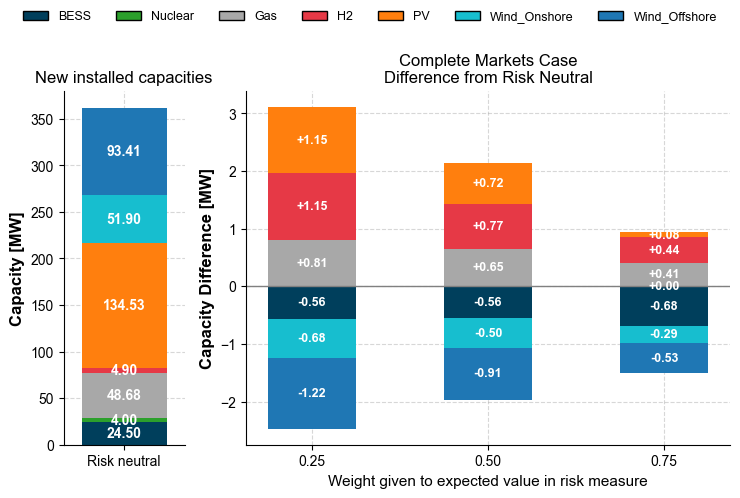

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\risk_aversion_results_O30_T672_new_final_unserved_fix_flex_gaspricescaled_cinvEldescheap_conwind.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 3.1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) > 0.9:
            #    ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight given to expected value in risk measure", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


| Metric         | Based on          | What it Tells You                                                                            |
| -------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| `total_demand` | `weighted_demand` | Total energy consumed over the year (in MWh), accounting for weights (e.g., time fractions). |
| `max_load`     | `load`            | Highest instantaneous demand (e.g., peak in MW).                                             |
| `min_load`     | `load`            | Lowest observed demand.                                                                      |
| `mean_load`    | `load`            | Average demand across all time steps.                                                        |
| `median_load`  | `load`            | The "middle" value — half the values are above, half below.                                  |
| `std_load`     | `load`            | Standard deviation — how much demand fluctuates around the mean.                             |
| `range_load`   | `load`            | Difference between max and min — indicates spread.                                           |
| `p10_load`     | `load`            | 10th percentile — 10% of values are below this.                                              |
| `p90_load`     | `load`            | 90th percentile — 90% of values are below this.                                              |


In [6]:

import pandas as pd
import numpy as np

# Weighted std function
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values - average) ** 2, weights=weights)
    return np.sqrt(variance)

# Weighted quantile function
def weighted_quantile(values, weights, quantile):
    values = np.array(values)
    weights = np.array(weights)
    
    sorter = np.argsort(values)
    values = values[sorter]
    weights = weights[sorter]
    
    cumulative_weight = np.cumsum(weights)
    total_weight = cumulative_weight[-1]
    
    return values[np.searchsorted(cumulative_weight, quantile * total_weight)]


# Load the uploaded data
load_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_load_profiles_672_30yr_new.csv")
weights_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\data\concatenated_weights_672_30yr_new.csv")

# Merge load and weight data
merged_df = pd.merge(load_df, weights_df, on=["T", "O"], how="inner")

# Compute weighted demand per timestep
merged_df["weighted_demand"] = merged_df["load"] * merged_df["weight"]

# Now build demand_stats with weighted metrics
demand_stats = (
    merged_df.groupby("O")
    .apply(lambda group: pd.Series({
        "total_demand": group["weighted_demand"].sum(),
        "total_weight": group["weight"].sum(),
        "average_load": group["weighted_demand"].sum() / group["weight"].sum(),
        "max_load": group["load"].max(),
        "min_load": group["load"].min(),
        #"mean_load": np.average(group["load"], weights=group["weight"]),
        "std_load": weighted_std(group["load"], group["weight"]),
        "range_load": group["load"].max() - group["load"].min(),
        "p10_load": weighted_quantile(group["load"], group["weight"], 0.10),
        "p90_load": weighted_quantile(group["load"], group["weight"], 0.90),
    }))
    .reset_index()
)

print(demand_stats)
demand_stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\demand_stats.csv", index=False)
# Define the tail scenarios
tail_scenarios = {2, 3, 6, 9, 10, 14, 15, 17, 18, 19, 20, 21, 25, 28}

# First, calculate total demand per scenario
total_demand_per_scenario = (
    merged_df.groupby("O", as_index=False)["weighted_demand"]
    .sum()
    .rename(columns={"weighted_demand": "total_demand"})
)
#print(total_demand_per_scenario)
# Split the scenarios
tail_df = total_demand_per_scenario[total_demand_per_scenario["O"].isin(tail_scenarios)]
non_tail_df = total_demand_per_scenario[~total_demand_per_scenario["O"].isin(tail_scenarios)]

# Calculate average total demand for each group
average_tail_demand = tail_df["total_demand"].mean()
average_non_tail_demand = non_tail_df["total_demand"].mean()

print("Average total demand (tail scenarios):", average_tail_demand)
print("Average total demand (non-tail scenarios):", average_non_tail_demand)


     O  total_demand  total_weight  average_load  max_load  min_load  \
0    1   5795.866199        8760.0      0.661629  0.935079  0.426762   
1    2   5694.585716        8760.0      0.650067  0.926317  0.444177   
2    3   5626.716457        8760.0      0.642319  0.931598  0.428581   
3    4   5815.532696        8760.0      0.663874  0.925387  0.444527   
4    5   5693.382130        8760.0      0.649929  0.946325  0.437674   
5    6   5495.396293        8760.0      0.627328  0.933371  0.396539   
6    7   5723.973734        8760.0      0.653422  0.927324  0.439406   
7    8   5764.580473        8760.0      0.658057  0.935021  0.446177   
8    9   5542.032482        8760.0      0.632652  0.907647  0.419137   
9   10   5542.032481        8760.0      0.632652  0.908546  0.439515   
10  11   5723.973734        8760.0      0.653422  0.938159  0.449913   
11  12   5723.973734        8760.0      0.653422  0.943096  0.440099   
12  13   5815.532695        8760.0      0.663874  0.928620  0.47

C:\Users\user\AppData\Local\Temp\ipykernel_33788\3211113593.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


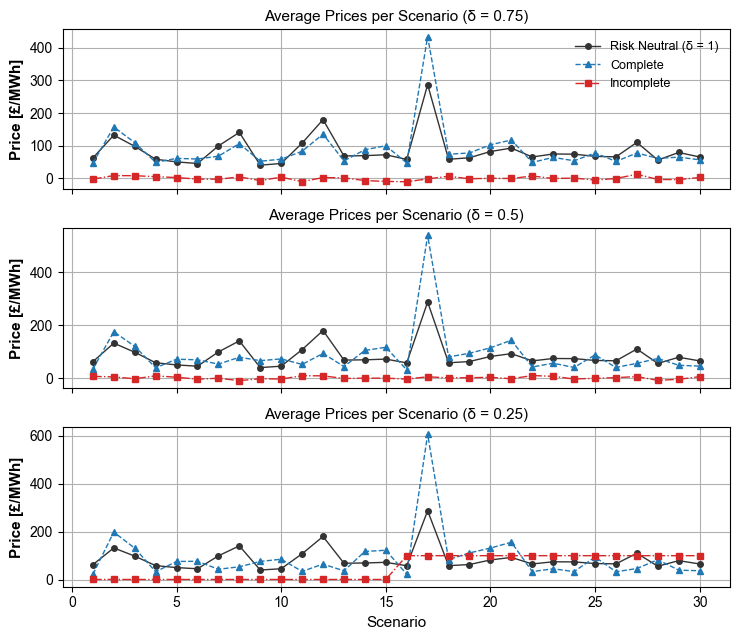

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 31)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = [
    62.5175,  # Scenario 1
    132.37,   # Scenario 2
    98.206,   # Scenario 3
    58.6017,  # Scenario 4
    50.4374,  # Scenario 5
    45.5212,  # Scenario 6
    99.3632,  # Scenario 7
    140.871,  # Scenario 8
    40.3656,  # Scenario 9
    45.6745,  # Scenario 10
    107.9986, # Scenario 11
    179.9354, # Scenario 12
    68.6057,  # Scenario 13
    69.5921,  # Scenario 14
    72.3425,  # Scenario 15
    58.0665,  # Scenario 16
    287.2342, # Scenario 17
    58.404,   # Scenario 18
    63.1958,  # Scenario 19
    82.2721,  # Scenario 20
    92.8066,  # Scenario 21
    65.5584,  # Scenario 22
    74.6666,  # Scenario 23
    74.1356,  # Scenario 24
    67.3517,  # Scenario 25
    65.9458,  # Scenario 26
    110.2803, # Scenario 27
    56.1573,  # Scenario 28
    79.2966,  # Scenario 29
    65.5692   # Scenario 30
]
price_complete_075 = [
    46.5194,   # Scenario 1
    157.507,   # Scenario 2
    109.4796,  # Scenario 3
    49.1238,   # Scenario 4
    61.2687,   # Scenario 5
    59.2999,   # Scenario 6
    67.9414,   # Scenario 7
    106.4325,  # Scenario 8
    52.5117,   # Scenario 9
    58.7636,   # Scenario 10
    83.0543,   # Scenario 11
    135.6535,  # Scenario 12
    53.555,    # Scenario 13
    87.7765,   # Scenario 14
    99.8549,   # Scenario 15
    47.3502,   # Scenario 16
    434.5354,  # Scenario 17
    73.8673,   # Scenario 18
    77.8595,   # Scenario 19
    102.8719,  # Scenario 20
    117.628,   # Scenario 21
    48.9309,   # Scenario 22
    64.2314,   # Scenario 23
    53.9266,   # Scenario 24
    77.8393,   # Scenario 25
    52.0111,   # Scenario 26
    77.6829,   # Scenario 27
    61.2812,   # Scenario 28
    65.0454,   # Scenario 29
    56.8249    # Scenario 30
]
price_incomplete_075 = np.random.normal(0, 5, 30)
price_complete_050 = [
    34.726,    # Scenario 1
    175.3731,  # Scenario 2
    120.3212,  # Scenario 3
    39.8552,   # Scenario 4
    71.8665,   # Scenario 5
    69.7024,   # Scenario 6
    53.4919,   # Scenario 7
    79.2552,   # Scenario 8
    66.4943,   # Scenario 9
    73.105,    # Scenario 10
    52.3864,   # Scenario 11
    93.6423,   # Scenario 12
    44.3264,   # Scenario 13
    105.0231,  # Scenario 14
    116.7662,  # Scenario 15
    31.8724,   # Scenario 16
    537.7776,  # Scenario 17
    80.475,    # Scenario 18
    94.2815,   # Scenario 19
    114.7481,  # Scenario 20
    143.284,   # Scenario 21
    42.5753,   # Scenario 22
    56.82,     # Scenario 23
    40.8605,   # Scenario 24
    88.2043,   # Scenario 25
    40.8162,   # Scenario 26
    56.4085,   # Scenario 27
    74.8975,   # Scenario 28
    49.0027,   # Scenario 29
    45.8761    # Scenario 30
]
price_incomplete_050 = np.random.normal(0, 5, 30)
price_complete_025 = [
    22.2821,   # Scenario 1
    198.1997,  # Scenario 2
    131.2788,  # Scenario 3
    33.2659,   # Scenario 4
    75.9603,   # Scenario 5
    76.6929,   # Scenario 6
    43.6124,   # Scenario 7
    53.6382,   # Scenario 8
    76.1554,   # Scenario 9
    85.1972,   # Scenario 10
    34.6655,   # Scenario 11
    64.9266,   # Scenario 12
    37.1294,   # Scenario 13
    117.6333,  # Scenario 14
    122.6483,  # Scenario 15
    22.6528,   # Scenario 16
    605.343,   # Scenario 17
    83.6735,   # Scenario 18
    111.5121,  # Scenario 19
    131.7513,  # Scenario 20
    155.9018,  # Scenario 21
    33.7821,   # Scenario 22
    45.4645,   # Scenario 23
    33.7415,   # Scenario 24
    94.5646,   # Scenario 25
    33.0852,   # Scenario 26
    46.513,    # Scenario 27
    83.2213,   # Scenario 28
    39.8138,   # Scenario 29
    37.2059    # Scenario 30
]
price_incomplete_025 = [1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,100 ,100 ,100, 100 ,100 ,100 ,100 ,100 ,100 ,100 ,100 ,100, 100 ,100, 100]

# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Incomplete': {'marker': 's', 'label': 'Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Incomplete'],
            color=colors['Incomplete'],
            marker=markers['Incomplete']['marker'],
            markersize=4,
            label=markers['Incomplete']['label'])
    ax.set_ylabel("Price [£/MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Average Prices per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=1, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

scenarios = np.arange(1, 31)  # 1 to 30

# === Dummy Data (replace with actual) ===
price_risk_neutral = []
price_complete_075 = []
price_incomplete_075 = price_risk_neutral + np.random.normal(0, 5, 30)
price_complete_050 = []
price_incomplete_050 = price_risk_neutral + np.random.normal(0, 5, 30)
price_complete_025 = []
price_incomplete_025 = price_risk_neutral + np.random.normal(0, 5, 30)

# === Setup ===
fig, axs = plt.subplots(3, 1, figsize=(7.5, 6.5), sharex=True)

# Common styling
line_styles = {
    'Risk Neutral': '-',
    'Complete': '--',
    'Incomplete': '-.'
}
markers = {
    'Risk Neutral': {'marker': 'o', 'label': 'Risk Neutral (δ = 1)'},
    'Complete': {'marker': '^', 'label': 'Complete'},
    'Incomplete': {'marker': 's', 'label': 'Incomplete'}
}
colors = {
    'Risk Neutral': '#333333',
    'Complete': '#1f77b4',   
    'Incomplete': '#d62728'  
}

def plot_lines(ax, delta, comp, incomp):
    ax.plot(scenarios, price_risk_neutral,
            linewidth=1,
            linestyle=line_styles['Risk Neutral'],
            color=colors['Risk Neutral'],
            marker=markers['Risk Neutral']['marker'],
            markersize=4,
            label=markers['Risk Neutral']['label'])

    ax.plot(scenarios, comp,
            linewidth=1,
            linestyle=line_styles['Complete'],
            color=colors['Complete'],
            marker=markers['Complete']['marker'],
            markersize=4,
            label=markers['Complete']['label'])

    ax.plot(scenarios, incomp,
            linewidth=1,
            linestyle=line_styles['Incomplete'],
            color=colors['Incomplete'],
            marker=markers['Incomplete']['marker'],
            markersize=4,
            label=markers['Incomplete']['label'])
    ax.set_ylabel("Unserved Energy [MWh]", fontsize=11, fontweight='bold')
    ax.set_title(f"Unserved Energy per Scenario (δ = {delta})", fontsize=11, fontweight='normal')
    ax.grid(True)

# Plot each subplot
plot_lines(axs[0], 0.75, price_complete_075, price_incomplete_075)
plot_lines(axs[1], 0.50, price_complete_050, price_incomplete_050)
plot_lines(axs[2], 0.25, price_complete_025, price_incomplete_025)
axs[2].set_xlabel("Scenario", fontsize=11, fontweight='normal')

# Legend only on top subplot
axs[0].legend(loc='upper right', ncol=3, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (0,) (30,) 

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


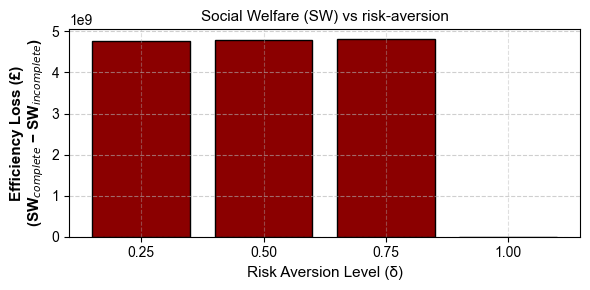

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Replace these with your actual values ===
deltas = [0.25, 0.5, 0.75, 1.0]
sw_complete = [4.769473812449704e9, 4.789860807079228e9, 4.81046366286335e9, 4.831240744171839e9]       # example social welfare values
sw_incomplete = [0, 0, 0, 4.831263931793333e9]      # example values

eff_loss = np.array(sw_complete) - np.array(sw_incomplete)

# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 3))

bars = ax.bar(deltas, eff_loss, width=0.2, color='#8B0000', edgecolor='black')

# Labels and grid
ax.set_ylabel("Efficiency Loss (£)\n(SW$_{complete}$ − SW$_{incomplete}$)", fontsize=11, fontweight='bold')
ax.set_xlabel("Risk Aversion Level (δ)", fontsize=11, fontweight='normal')
ax.set_xticks(deltas)
ax.set_xticklabels([f"{d:.2f}" for d in deltas])
ax.set_title("Social Welfare (SW) vs risk-aversion", fontsize=11)

# Gridlines on both axes
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [297]:
import pandas as pd

# === Load your actual files ===
cf = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_capacity_factors_672_30yr_new_final_lf.csv")
demand = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_load_profiles_672_30yr_new_final.csv")
weights = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new_final.csv")

# === Reshape capacity factors to wide format ===
cf_wide = cf.pivot_table(index=["O", "T"], columns="G", values="value").reset_index()

# === Rename other columns ===
demand.rename(columns={"value": "demand"}, inplace=True)
weights.rename(columns={"value": "weight"}, inplace=True)

# === Merge all data on scenario (O) and time (T) ===
df = cf_wide.merge(demand, on=["O", "T"]).merge(weights, on=["O", "T"])

# === Compute weighted metrics per scenario ===
scenario_stats = []

for scenario in df["O"].unique():
    df_s = df[df["O"] == scenario]
    weight_sum = df_s["weight"].sum()

    windon_weighted = ((df_s["Wind_Onshore"]) * df_s["weight"]).sum() / weight_sum
    windoff_weighted = ((df_s["Wind_Offshore"]) * df_s["weight"]).sum() / weight_sum
    pv_weighted = (df_s["PV"] * df_s["weight"]).sum() / weight_sum
    demand_weighted = (df_s["demand"] * df_s["weight"]).sum()

    scenario_stats.append({
        "scenario": scenario,
        "windon_weighted": windon_weighted,
        "windoff_weighted": windoff_weighted,
        "pv_weighted": pv_weighted,
        "demand_weighted": demand_weighted
    })

stats_df = pd.DataFrame(scenario_stats)

stats_df.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Comparison_central_planner_ADMM\stats_for_scenario.csv", index=False)



Gas Utilisation

In [11]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
dispatch_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\H2_high_duration\gas_dispatch_delta_0.5.csv")
time_weight_df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\Complete_markets_risk_averse_central_planner\data_final\f672\concatenated_weights_672_30yr_new.csv")

# Prepare tail scenario set
tail_scenarios = {10,14,15,17,18,19,20,21,25,28,2,3,5,6,9}

# Merge time weights into dispatch data
time_weight_df = time_weight_df.rename(columns={"T": "Time", "O": "Scenario", "value": "TimeWeight"})
print(dispatch_df.columns)
# Filter for gas generator safely
gas_dispatch_df = dispatch_df.loc[dispatch_df["Generator"].str.lower() == "nuclear"].copy()

# Ensure correct data type for Scenario
gas_dispatch_df["Scenario"] = gas_dispatch_df["Scenario"].astype(int)

# Merge with time weights
merged_df = gas_dispatch_df.merge(time_weight_df, on=["Time", "Scenario"], how="left")


merged_df["IsTail"] = merged_df["Scenario"].isin(tail_scenarios)

# Compute weighted dispatch
merged_df["WeightedDispatch"] = merged_df["Dispatch"] * merged_df["TimeWeight"]

# Aggregates and gas capacity
tail_dispatch = merged_df.loc[merged_df["IsTail"], "WeightedDispatch"].sum()
non_tail_dispatch = merged_df.loc[~merged_df["IsTail"], "WeightedDispatch"].sum()

total_hours_tail = merged_df.loc[merged_df["IsTail"], "TimeWeight"].sum()
total_hours_non_tail = merged_df.loc[~merged_df["IsTail"], "TimeWeight"].sum()

gas_capacity_mw = 3.999999
avg_mw_tail = tail_dispatch / total_hours_tail
avg_mw_non_tail = non_tail_dispatch / total_hours_non_tail
utilization_tail = avg_mw_tail / gas_capacity_mw
utilization_non_tail = avg_mw_non_tail / gas_capacity_mw

print({
    "Tail Dispatch (MWh)": tail_dispatch,
    "Non-Tail Dispatch (MWh)": non_tail_dispatch,
    "Avg MW Tail": avg_mw_tail,
    "Avg MW Non-Tail": avg_mw_non_tail,
    "Utilization Tail (%)": utilization_tail * 100,
    "Utilization Non-Tail (%)": utilization_non_tail * 100
})


Index(['Time', 'Scenario', 'Generator', 'Dispatch'], dtype='object')
{'Tail Dispatch (MWh)': 492156.48739765654, 'Non-Tail Dispatch (MWh)': 496295.4697001864, 'Avg MW Tail': 3.745483161321587, 'Avg MW Non-Tail': 3.776982265602636, 'Utilization Tail (%)': 93.6371024423153, 'Utilization Non-Tail (%)': 94.42458024621097}


In [6]:
import pandas as pd
import numpy as np

# Load the dispatch and time weight files
df = pd.read_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\prices_delta_0.5.csv")
# Group by scenario and compute stats
stats = df.groupby("O")["price"].agg(
    avg_price="mean",
    std_price="std",
    min_price="min",
    max_price="max"
).reset_index()

# Save to a new CSV (optional)
stats.to_csv(r"C:\Users\user\Desktop\msc-thesis-incomplete-markets-LDES\models\my_hpc_project_riskaverseCON_CPLEX\scenario_price_stats.csv", index=False)
# Display result
print(stats)

     O   avg_price   std_price    min_price    max_price
0    1  -92.415409  301.631163 -5506.241616     0.002468
1    2  -83.741818   87.115456 -1538.747856     0.000326
2    3 -130.693111  558.311685 -7174.356202     0.001287
3    4  -87.415104   65.158790  -471.985478    -0.000727
4    5  -83.292809  203.042581 -4998.012318     0.000290
5    6  -74.593552   67.137158  -381.861325     0.001177
6    7 -100.731669  373.831197 -8998.617740     0.005556
7    8  109.940133  230.367473     0.001100  2951.112739
8    9   74.022911   67.476439    -0.001404   364.001419
9   10   86.636250  213.793968    -0.000791  5335.802815
10  11   97.956290  304.861787     0.000355  7802.504080
11  12  107.904334  319.004073    -0.002740  5904.166880
12  13   96.568151  148.690778     0.001793  2903.997916
13  14  105.662751  329.077378    -0.001289  7000.894498
14  15  103.087852  349.178257    -0.000272  8284.161060
15  16   93.930756  181.975261     0.001851  4504.922401
16  17   87.523139  201.144475 